# Recent image

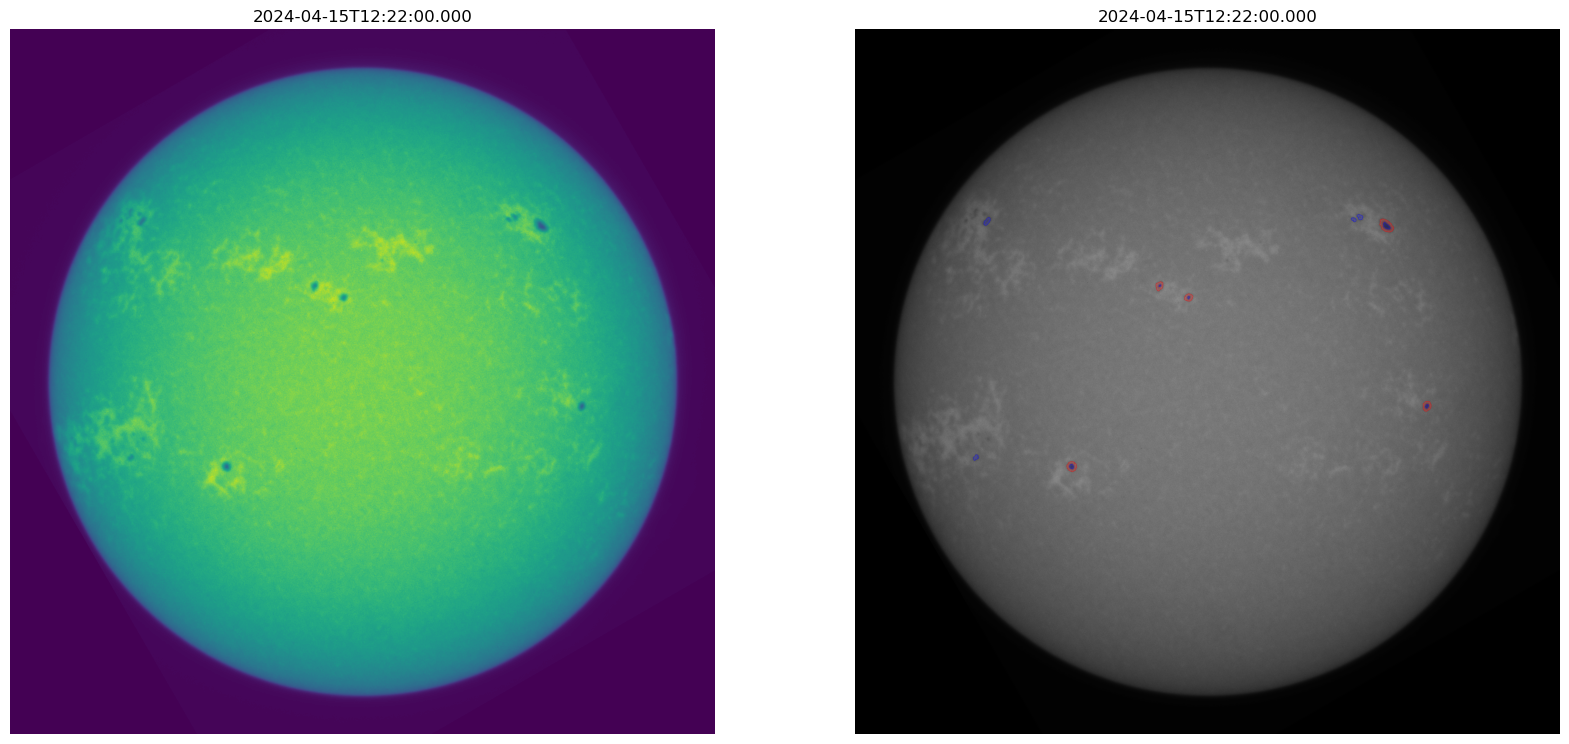

In [3]:
from module import toSunpyMap, getMostRecent, drawSunspots
import matplotlib.pyplot as plt

directory = 'Z:/data/CLIMSO/2024/data_calibrated'

file = getMostRecent(directory, '_l2_')

map = toSunpyMap(file, center_disk=True)

img = drawSunspots(map)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(map.data, origin='lower')
plt.axis('off')
plt.title(map.date);

plt.subplot(122)
plt.imshow(img, origin='lower')
plt.axis('off')
plt.title(map.date);

In [5]:
from module import groupSunspots, assignNOAAToTable

table = groupSunspots(map)

table = assignNOAAToTable(table, map)

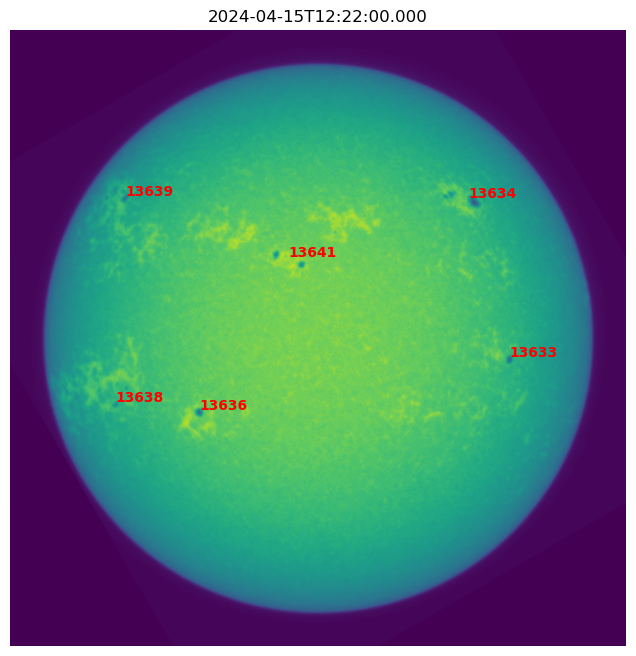

In [34]:
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=map)
plt.imshow(map.data, axes=ax, origin='lower')
plt.axis('off')
plt.title(map.date);

for region in table:
    ax.plot_coord(SkyCoord(region['longitude'],
                region['latitude'], 
                obstime=map.date,
                observer='earth', 
                frame=frames.HeliographicStonyhurst,
                ).transform_to(map.coordinate_frame), '')
    ax.annotate( region['noaa'],
                (region['longitude'].value, region['latitude'].value),
                xycoords=ax.get_transform('heliographic_stonyhurst'),
                color='red',
                fontweight='bold',
                horizontalalignment='left', verticalalignment='bottom')


In [25]:
table

label,id,noaa,longitude,latitude,x,y
,,,deg,deg,pix,pix
uint16,int32,int32,float64,float64,float64,float64
1,--,13636,-27.89045399324135,-20.857855914589397,629.0,776.0
2,--,13638,-51.62507332060824,-17.734302987558472,350.0,802.0
3,--,13633,45.41791897619135,-8.552497068148677,1660.0,951.0
4,--,13641,-6.409559773300714,11.196370617809281,925.0,1284.0
5,--,13634,37.98232673315196,26.088149957894398,1523.0,1481.0
6,--,13639,-53.408669450760726,27.743469438638552,383.0,1488.0
